In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import cv2 as cv
import os

In [2]:
assets_path = 'data/assets'
assets = os.listdir(assets_path)
print(len(assets))

296


In [3]:
data = []
pages = sorted(list(map(int, set([fname.split('-')[0] for fname in assets]))))
for page in pages:
    page_signs = [a for a in assets if a.startswith(f'{page}-')]
    signs = sorted(list(map(int, set([fname.split('-')[1] for fname in page_signs]))))
    for sign in signs:
        data.append([f'page {page} sign {sign}'] + [a for a in page_signs if a.startswith(f'{page}-{sign}-')])
print(len(data))

148


In [ ]:
dataset_path = 'data/dataset.csv'
if os.path.exists(dataset_path):
    dataset = pd.read_csv(dataset_path)
else:
    dataset = pd.DataFrame(columns=['id', 'img_path', 'desc_path', 'page', 'sign', 'eng_desc', 'rus_desc'])
print(dataset.shape)

(1, 7)


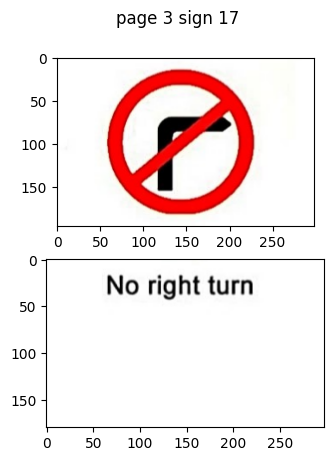

In [174]:
i = len(dataset)
pair_name, desc_name, sign_name = data[i]
desc_path = os.path.join(assets_path, desc_name)
sign_path = os.path.join(assets_path, sign_name)
page_id, sign_id = desc_name.split('-')[:2]
desc = cv.cvtColor(cv.imread(desc_path), cv.COLOR_BGR2RGB)
sign = cv.cvtColor(cv.imread(sign_path), cv.COLOR_BGR2RGB)
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.imshow(sign)
ax2.imshow(desc)
f.suptitle(pair_name)
plt.show()

In [173]:
eng_desc = 'No right turn'
rus_desc = 'Запрет правого поворота'
dataset.loc[i] = [i, sign_path, desc_path, page_id, sign_id, eng_desc, rus_desc]
dataset.to_csv(dataset_path, index=False)

In [175]:
dataset.iloc[-15:]

,id,img_path,desc_path,page,sign,eng_desc,rus_desc
61,61,data/assets/3-2-img.png,data/assets/3-2-desc.png,3,2,No motorbikes,Никаких мотоциклов
62,62,data/assets/3-3-img.png,data/assets/3-3-desc.png,3,3,No mopeds,Никаких мопедов
63,63,data/assets/3-4-img.png,data/assets/3-4-desc.png,3,4,No pedestrians,Никаких пешеходов
64,64,data/assets/3-5-img.png,data/assets/3-5-desc.png,3,5,No entry for vehicular traffic,Въезд автотранспорта запрещён
65,65,data/assets/3-6-img.png,data/assets/3-6-desc.png,3,6,No motor vehicles except two-wheeled vehicles,Запрещён въезд любого автотранспорта кроме дву...
66,66,data/assets/3-7-img.png,data/assets/3-7-desc.png,3,7,No tractors,Никаких тракторов
67,67,data/assets/3-8-img.png,data/assets/3-8-desc.png,3,8,No animal-pulled vehicles,Никакого гужевого транспорта
68,68,data/assets/3-9-img.png,data/assets/3-9-desc.png,3,9,Stop for toll post,Остановка у поста для взимания платы
69,69,data/assets/3-10-img.png,data/assets/3-10-desc.png,3,10,Maximum speed,Максимальная скорость
70,70,data/assets/3-11-img.png,data/assets/3-11-desc.png,3,11,No use of horn,Не бибикать
